# Table of contents

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Import Library

In [948]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [949]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Loading Data

In [950]:
stroke = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 1. Data Preprocessing

In [951]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [952]:
stroke.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [953]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 *The Age columns have a type float64 that mean inside data have a float number rows*

In [954]:
stroke[stroke['age']<2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [955]:
stroke['age']=stroke['age'].astype(int)
stroke['age']=stroke['age'].replace([0],1)
stroke[stroke['age']<=9]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,Unknown,1
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,11014,Male,4,0,0,No,children,Rural,79.17,20.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8,0,0,No,children,Urban,76.31,15.5,Unknown,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,Unknown,0
5095,68598,Male,1,0,0,No,children,Rural,79.15,17.4,Unknown,0


  ##### *At the smoking_status columns, from 1 to 9 years old, the data set has the value 'Unknown', So I did a search and statistic that in children under 10, the smoking rate seems to be less than <1%*
   > [Children and young people use tobacco](https://www.blackpooljsna.org.uk/Home.aspx)



In [956]:
df=stroke[(stroke['age']<=9) & (stroke['smoking_status']=='Unknown')]
df['smoking_status']=df['smoking_status'].replace(['Unknown'],'never smoked')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,never smoked,1
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
251,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,never smoked,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,never smoked,0
291,11014,Male,4,0,0,No,children,Rural,79.17,20.0,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8,0,0,No,children,Urban,76.31,15.5,never smoked,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,never smoked,0
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,never smoked,0
5095,68598,Male,1,0,0,No,children,Rural,79.15,17.4,never smoked,0


In [957]:
df1=stroke[(stroke['age']<=9) & (stroke['smoking_status']!='Unknown')|(stroke['age']>9)]

In [958]:
stroke=pd.concat([df,df1])

In [959]:
stroke.shape

(5110, 12)

In [960]:
stroke[stroke['age']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,never smoked,1
363,7559,Female,1,0,0,No,children,Urban,83.82,24.9,never smoked,0
376,22706,Female,1,0,0,No,children,Rural,88.11,15.5,never smoked,0
562,45238,Female,1,0,0,No,children,Urban,58.26,16.5,never smoked,0
564,61511,Female,1,0,0,No,children,Rural,73.71,16.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1,0,0,No,children,Rural,107.02,NaN,never smoked,0
5032,67426,Female,1,0,0,No,children,Rural,61.94,20.3,never smoked,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,never smoked,0
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,never smoked,0


In [961]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

*The column BMI is missing data, so i need to solve this problem*

In [962]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

At this data, we have 201/5110 percent for missing data at BMI column. its approximate 4% data, so i think the best way is filling missing values by mean

In [963]:
stroke[stroke['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,never smoked,1
742,33723,Female,9,0,0,No,children,Urban,95.81,NaN,never smoked,0
1194,542,Female,3,0,0,No,children,Urban,79.63,NaN,never smoked,0
1277,33187,Female,6,0,0,No,children,Urban,201.25,NaN,never smoked,0
1471,937,Male,7,0,0,No,children,Urban,87.94,NaN,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [964]:
mean=stroke['bmi'].mean(skipna=True)
stroke['bmi']=stroke['bmi'].mask(stroke['bmi'].isnull(),mean)

In [965]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Show all unique classes

In [966]:
for col in stroke.columns:
    if(stroke.dtypes[col]=='O'):
        print('-----------------------\n',stroke[col].value_counts())

-----------------------
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-----------------------
 Yes    3353
No     1757
Name: ever_married, dtype: int64
-----------------------
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-----------------------
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-----------------------
 never smoked       2364
Unknown            1072
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### Drop the Unsual from the datase

In [967]:
stroke=stroke.drop(columns='id',axis=1)

In [968]:
stroke.drop(stroke.loc[stroke['smoking_status']=='Unknown'].index, inplace=True)
stroke.shape

(4038, 11)

In [969]:
stroke = stroke[stroke['gender']!='Other']

In [970]:
stroke=stroke.reset_index(drop=True)

In [971]:
stroke_Final=stroke.copy()

#### Encoding Categorical Features

In [972]:
stroke["Residence_type"] = stroke["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
stroke["ever_married"] = stroke["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
stroke["gender"] = stroke["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [973]:
stroke = pd.get_dummies(data=stroke, columns=['smoking_status'])
stroke = pd.get_dummies(data=stroke, columns=['work_type'])

In [974]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0,0,1,70.37,28.893237,1,0,1,0,0,0,0,0,1
1,1,3,0,0,0,0,95.12,18.000000,0,0,1,0,0,0,0,0,1
2,0,8,0,0,0,1,110.89,17.600000,0,0,1,0,0,0,1,0,0
3,0,3,0,0,0,1,73.74,16.000000,0,0,1,0,0,0,0,0,1
4,1,4,0,0,0,0,79.17,20.000000,0,0,1,0,0,0,0,0,1


In [975]:
stroke_Final.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,1,0,0,No,children,Urban,70.37,28.893237,never smoked,1
1,Male,3,0,0,No,children,Rural,95.12,18.000000,never smoked,0
2,Female,8,0,0,No,Private,Urban,110.89,17.600000,never smoked,0
3,Female,3,0,0,No,children,Urban,73.74,16.000000,never smoked,0
4,Male,4,0,0,No,children,Rural,79.17,20.000000,never smoked,0


##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 2. Visualization

## Count stroke

In [976]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df[df['gender'] != 'Other']
df.rename({'Residence_type': 'residence_type'}, axis=1, inplace=True)
mean = df['bmi'].mean(skipna=True)
df['bmi']= df['bmi'].mask(df['bmi'].isnull(), mean)
df.drop(columns=['id', 'ever_married', 'work_type', 'residence_type', 'smoking_status'], inplace=True)

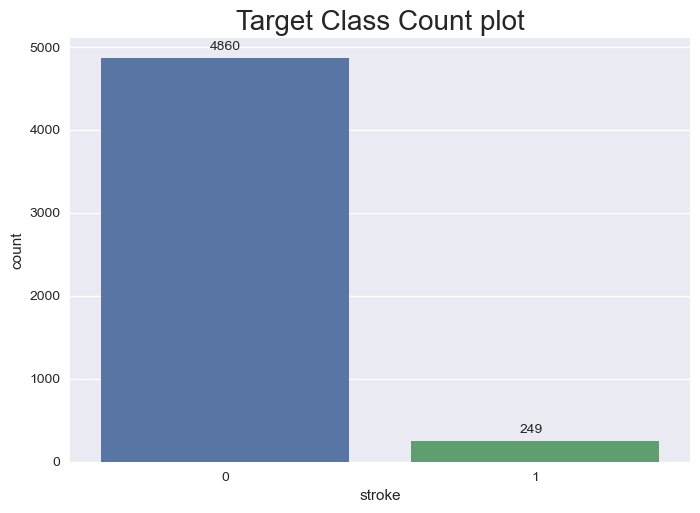

In [977]:
ax = sns.countplot(data=df, x='stroke')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+100)) for p in ax.patches]
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Target Class Count plot', fontsize=20)
plt.show()

## Age Distribution

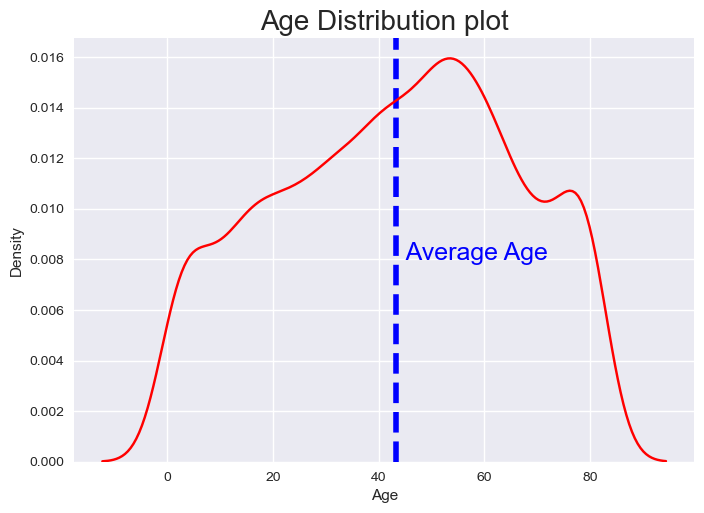

In [978]:
ax = sns.kdeplot(df['age'], color='lightgray')
ax.lines[0].set_color('red')
plt.axvline(df['age'].mean(), linestyle='--', lw=4, zorder=1, color='blue')
plt.annotate(f' Average Age', (44, 0.008), fontsize=18,color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Age Distribution plot', fontsize=20)
plt.xlabel('Age')
plt.show()

### Gender

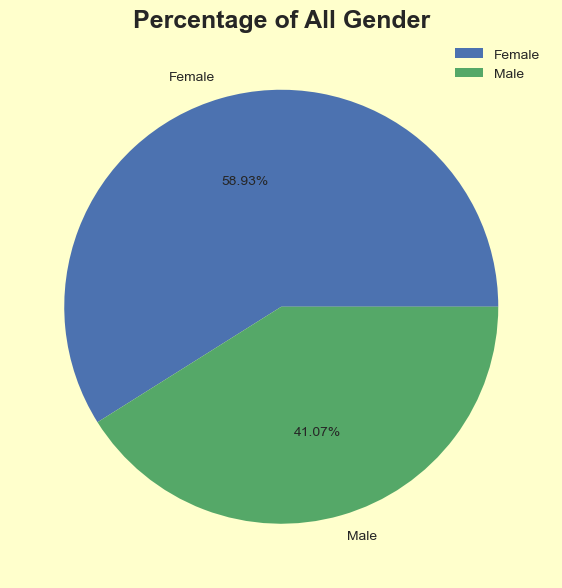

In [979]:
fig, ax = plt.subplots(figsize = (7,8))
labels = [ 'Female','Male']
plt.pie(stroke_Final["gender"].value_counts(),autopct='%1.2f%%',labels=labels)
plt.title("Percentage of All Gender",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

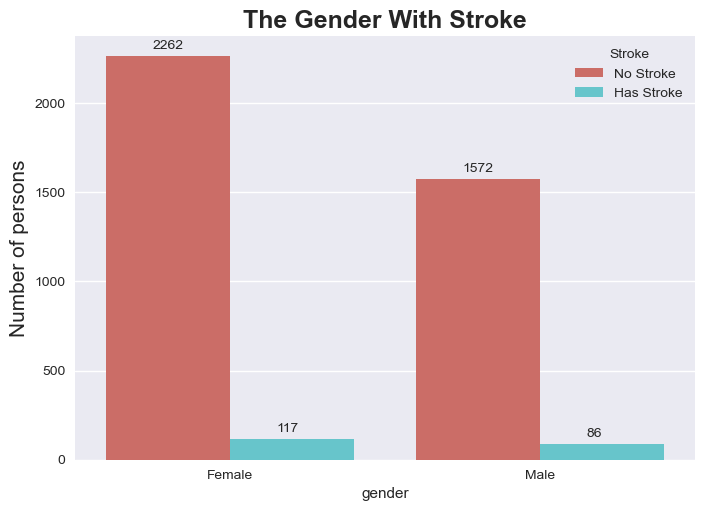

In [980]:
ax=sns.countplot(x='gender', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.title("The Gender With Stroke",fontsize=18,fontweight="bold")
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')

### BOXPLOT with three feature AGE, BMI , AVG_GLUTCOSE_LEVEL

In [981]:
Have_stroke=stroke_Final[stroke_Final['stroke']==1]
Non_stroke=stroke_Final[stroke_Final['stroke']==0]

In [982]:
stroke_Final["index"]= range(1, len(stroke_Final) + 1)
Have_stroke["index"]= range(1, len(Have_stroke) + 1)
Non_stroke["index"]= range(1, len(Non_stroke) + 1)

##### *Three features when has a stroke*

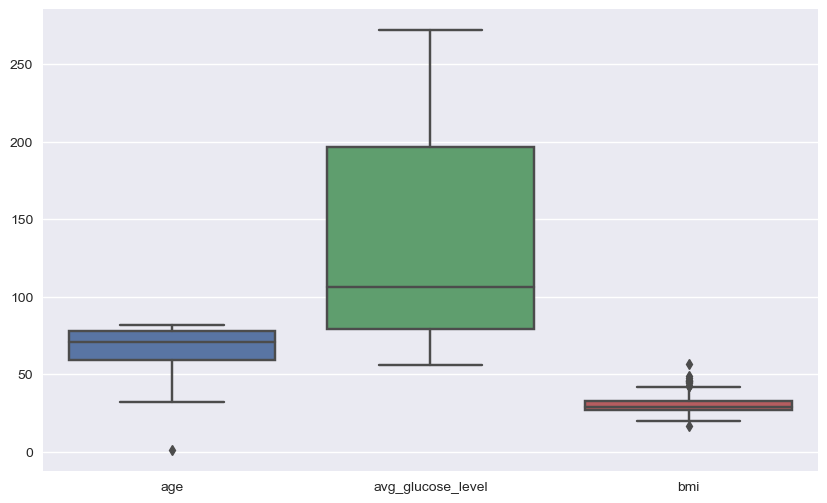

In [983]:
col=['age','avg_glucose_level','bmi']
plt.figure(figsize=(10,6), facecolor='w')
sns.boxplot(data=stroke_Final[stroke_Final['stroke']==1][col])
plt.show()

##### *Three features when there is no a stroke*

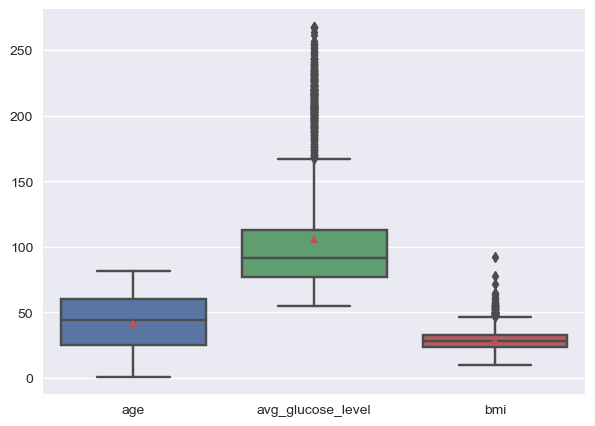

In [984]:
col=['age','avg_glucose_level','bmi']
plt.figure(figsize=(7,5), facecolor='w')
sns.boxplot(data=stroke_Final[stroke_Final['stroke']==0][col], showmeans=True)
plt.show()

### Hypertension

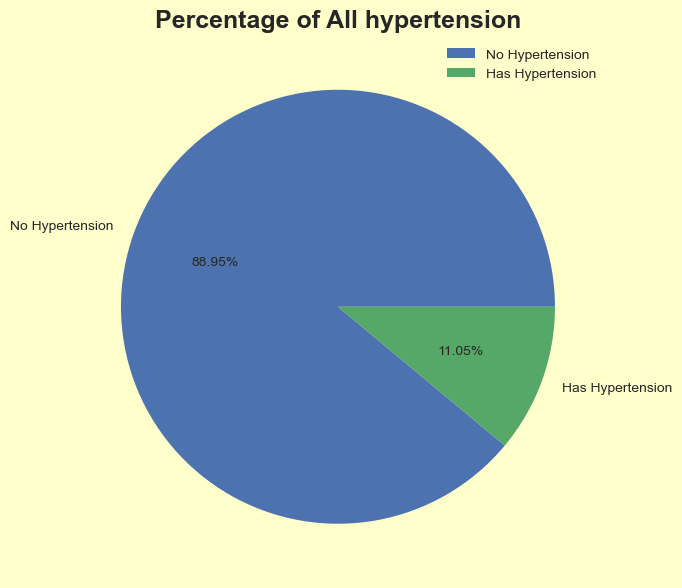

In [985]:
labels = ['No Hypertension', 'Has Hypertension']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["hypertension"].value_counts(),autopct='%1.2f%%',labels=labels)
plt.title("Percentage of All hypertension",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

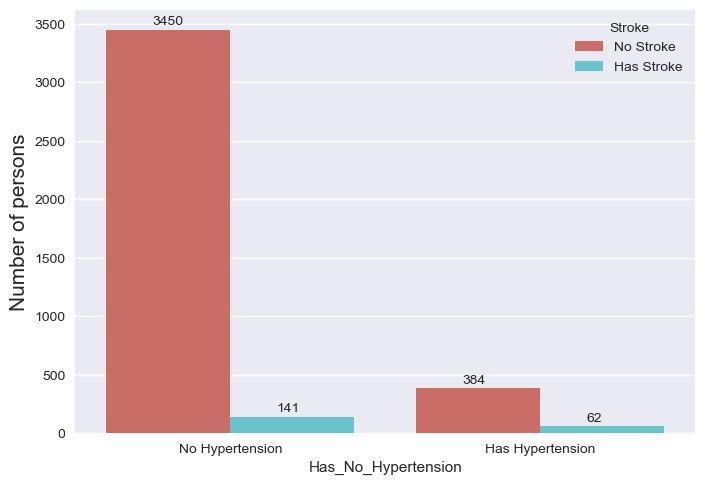

In [986]:
Object={0:"No Hypertension",1:"Has Hypertension"}
stroke_Final["Has_No_Hypertension"]=stroke_Final['hypertension']
stroke_Final['Has_No_Hypertension']=stroke_Final['Has_No_Hypertension'].map(Object)
ax=sns.countplot(x='Has_No_Hypertension', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Heart_disease

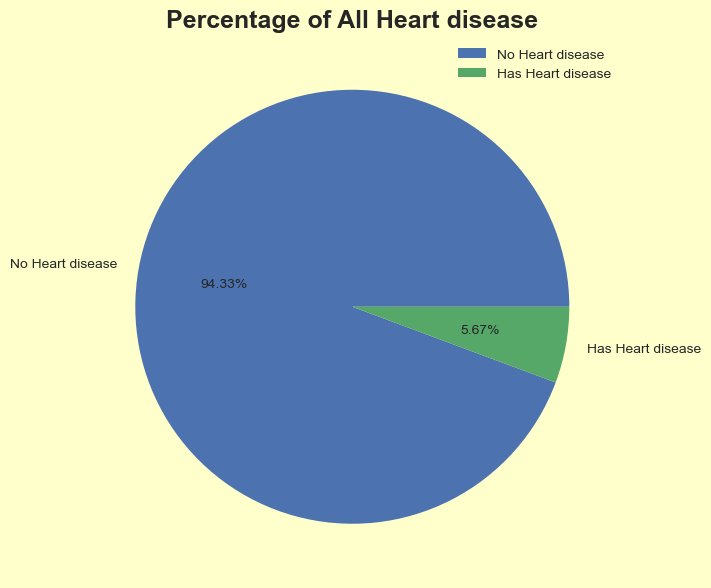

In [987]:
labels = ['No Heart disease', 'Has Heart disease']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["heart_disease"].value_counts(),autopct='%1.2f%%', labels=labels)
plt.title("Percentage of All Heart disease",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

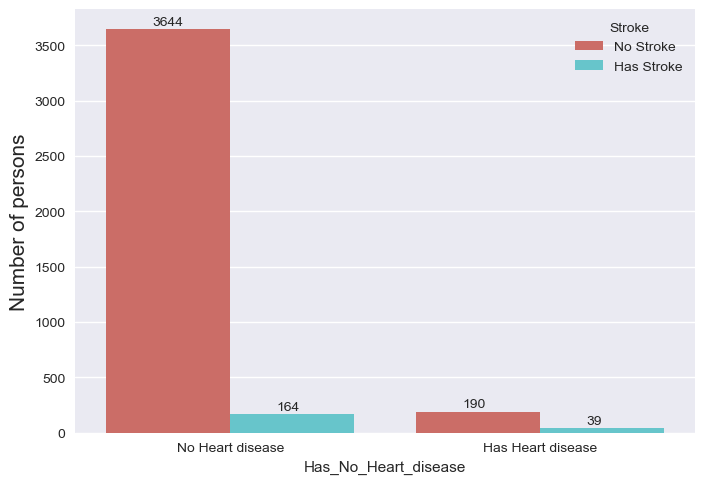

In [988]:
Object={0:"No Heart disease",1:"Has Heart disease"}
stroke_Final["Has_No_Heart_disease"]=stroke_Final['heart_disease']
stroke_Final['Has_No_Heart_disease']=stroke_Final['Has_No_Heart_disease'].map(Object)
ax=sns.countplot(x='Has_No_Heart_disease', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Ever married

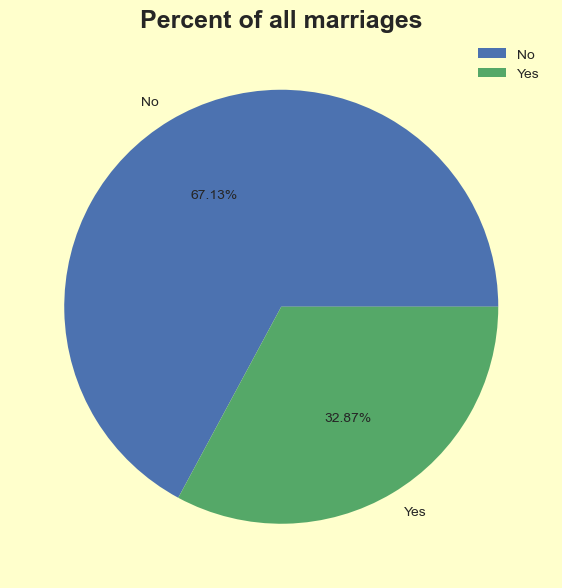

In [989]:
labels = ['No', 'Yes']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["ever_married"].value_counts(),autopct='%1.2f%%',labels=labels)
plt.title("Percent of all marriages",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

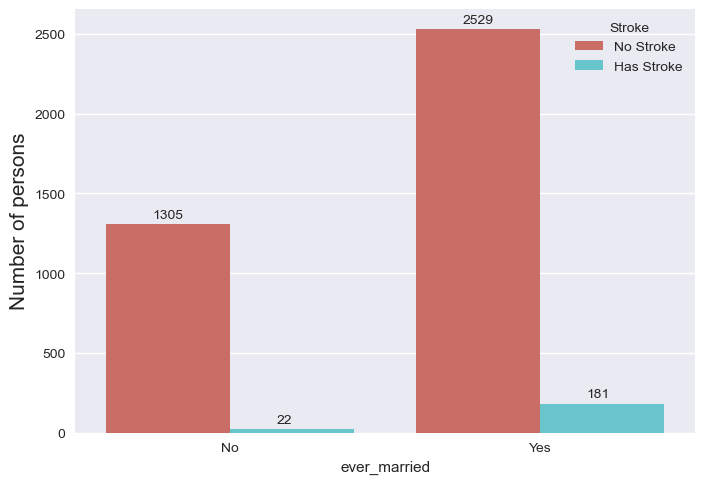

In [990]:
ax=sns.countplot(x='ever_married', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Work type

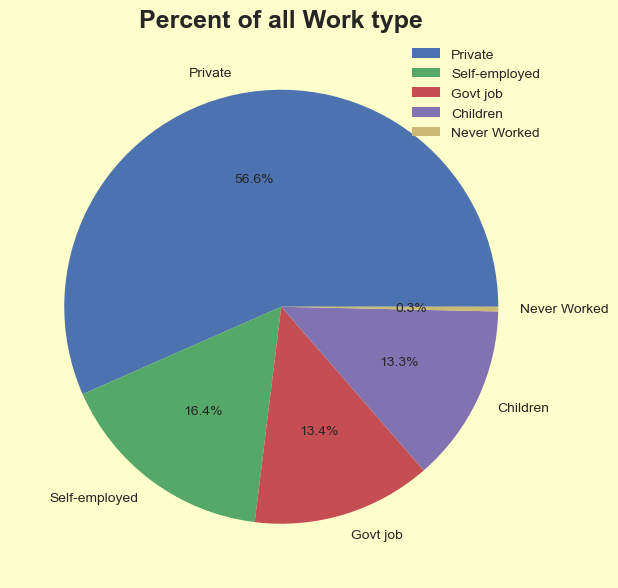

In [991]:
labels = ['Private', 'Self-employed', 'Govt job', 'Children','Never Worked']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["work_type"].value_counts(),labels=labels, autopct='%1.1f%%')
plt.title("Percent of all Work type",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

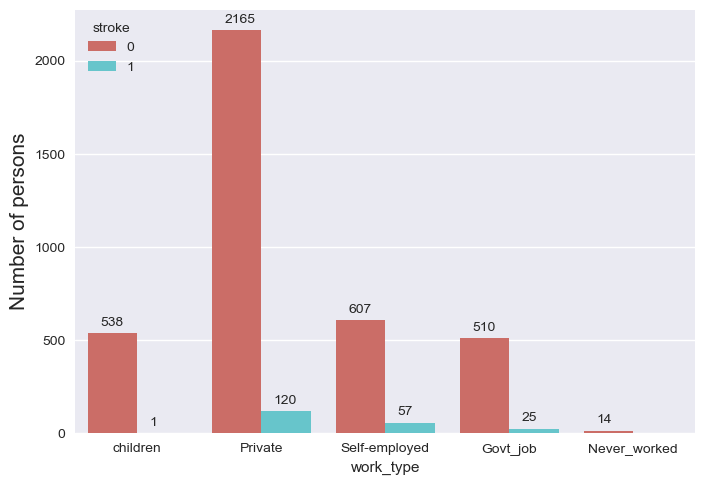

In [992]:
ax=sns.countplot(x='work_type', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.show()

### Residence_type

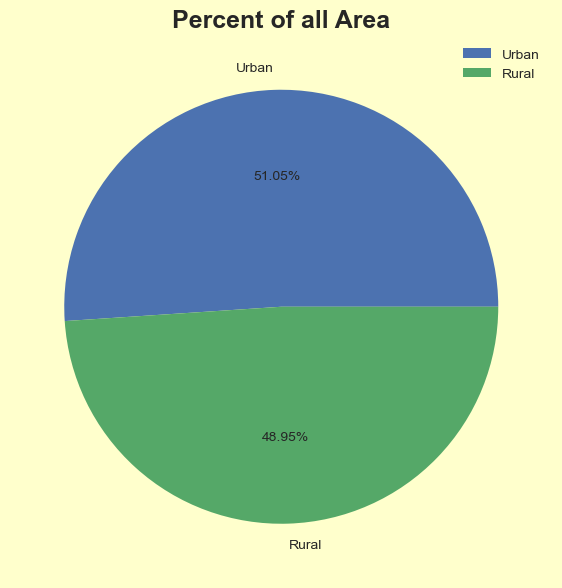

In [993]:
labels = ['Urban', 'Rural']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["Residence_type"].value_counts(),autopct='%1.2f%%', labels=labels)
plt.title("Percent of all Area",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

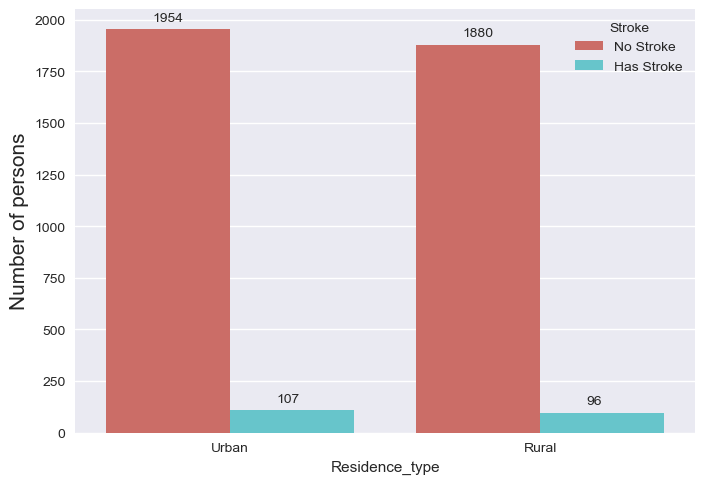

In [994]:
ax=sns.countplot(x='Residence_type', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Smoking_status

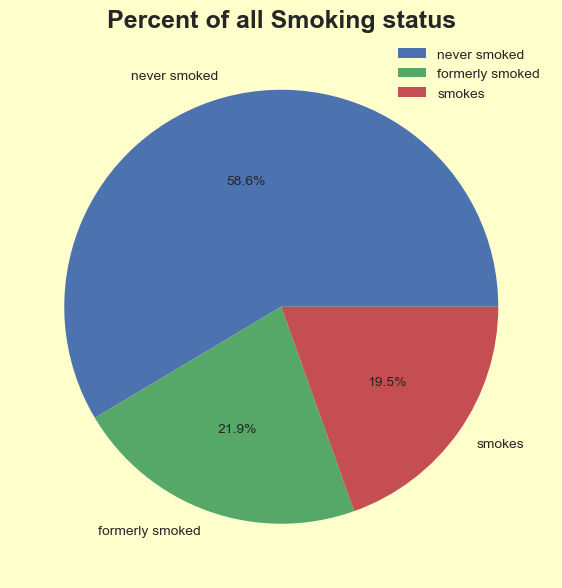

In [995]:
labels = ['never smoked', 'formerly smoked', 'smokes']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["smoking_status"].value_counts(),labels=labels, autopct='%1.1f%%')
plt.title("Percent of all Smoking status",fontsize=18,fontweight="bold")
fig.set_facecolor('#FFFFCC')
plt.legend()
plt.show()

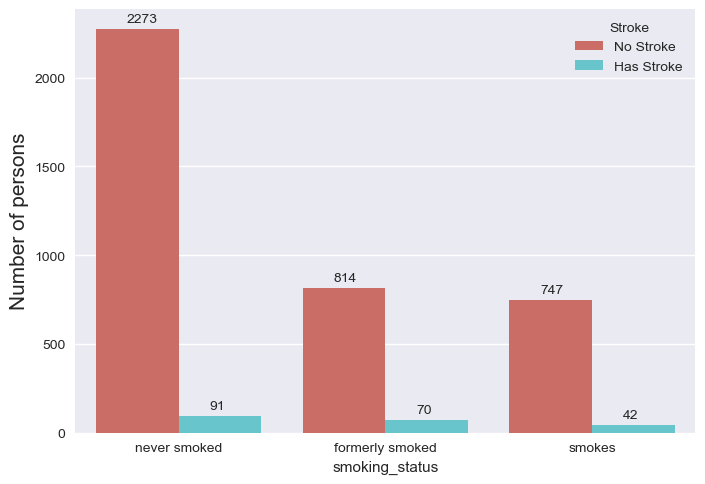

In [996]:
ax=sns.countplot(x='smoking_status', data=stroke_Final, hue =stroke_Final['stroke'],palette='hls')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

## Average Glucose Level Distribution

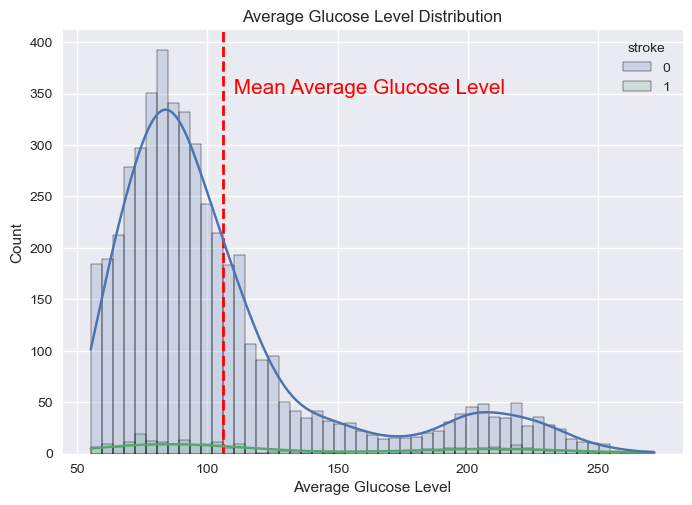

In [997]:
ax = sns.histplot(data=df, x= df['avg_glucose_level'], kde=True,hue=df['stroke'], alpha=0.2)
plt.axvline(df['avg_glucose_level'].mean(), linestyle='--', lw=2, zorder=1, color='red')
plt.annotate(f' Mean Average Glucose Level', (108, 350), fontsize=15,color='red')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Correlation Matrix

<AxesSubplot:>

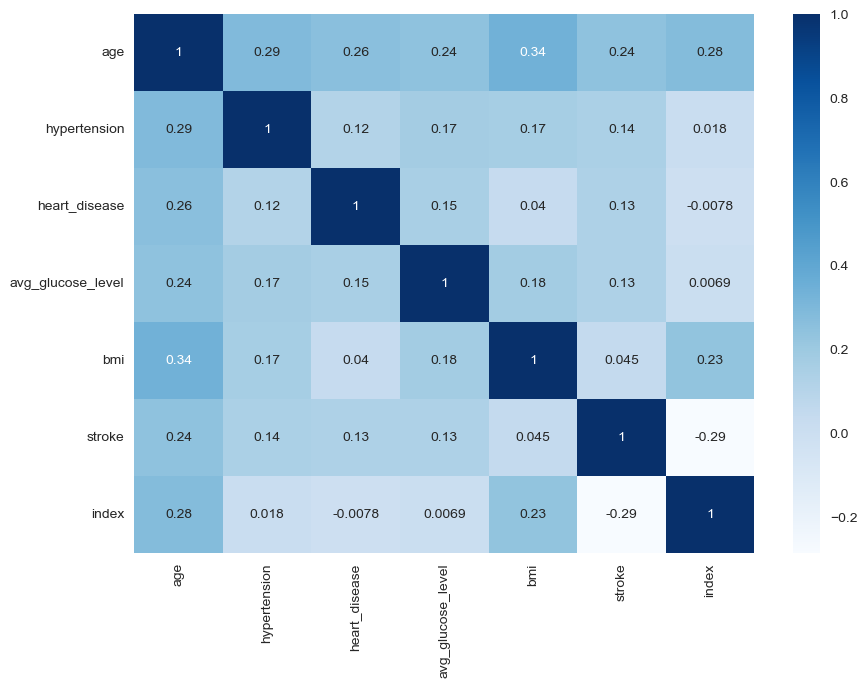

In [998]:
plt.figure(figsize=(10,7))
corrmat = stroke_Final.corr()
sns.heatmap(data=corrmat,annot=True, cmap="Blues")

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 3. Model Building

### Data Splitting

In [999]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.rename({'Residence_type': 'residence_type'}, axis=1, inplace=True)
mean = df['bmi'].mean(skipna=True)
df['bmi']= df['bmi'].mask(df['bmi'].isnull(), mean)
df.drop(columns=['id', 'ever_married', 'work_type', 'residence_type', 'smoking_status'], inplace=True)

In [1000]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

In [1001]:
X.shape

(5110, 6)

In [1002]:
Y.shape

(5110,)

In [1003]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.20, random_state =42, stratify=Y)

In [1004]:
X_train.shape

(4088, 6)

In [1005]:
Y_train.shape

(4088,)

In [1006]:
Y_train.value_counts()

0    3889
1     199
Name: stroke, dtype: int64

### Imbalance Data

In [1007]:
label_encoder = LabelEncoder()
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])

In [1008]:
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

In [1009]:
rob_scaler = StandardScaler()
X_train['age'] = rob_scaler.fit_transform(X_train['age'].values.reshape(-1,1))
X_train['avg_glucose_level'] = rob_scaler.fit_transform(X_train['avg_glucose_level'].values.reshape(-1,1))
X_train['bmi'] = rob_scaler.fit_transform(X_train['bmi'].values.reshape(-1,1))

In [1010]:
Y_train.value_counts()

0    3889
1    3889
Name: stroke, dtype: int64

#### Data Scaling

In [1011]:
X_train.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0,-0.325591,0,0,-0.893447,0.564813
1,1,-1.837940,0,0,0.066617,-1.304411
2,0,0.545156,0,0,-0.147515,-0.701934
3,1,-0.508906,0,0,-0.962230,-0.717382
4,1,-1.883769,0,0,-0.655785,0.333091


### Modeling

In [1012]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
          GradientBoostingClassifier(), SVC()]

In [1013]:
# Change parameters here
lr_params = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [-1000, -100, -10, -0.1, -0.01, 0, 0.1, 0.01, 1, 10, 100]
}
dt_params = {
    "max_depth": list(range(4, 23)),
    "max_features" : [2,3,4,5,6]
}
rf_params = {
    "max_depth": list(range(6,16)), 
    "max_features" : [2,3,4,5,6]
}
gb_params = {
    "max_depth": list(range(6,16)),
    "max_features" : [2,3,4,5,6]
}
svm_params = {
    "C": [-1000, -100, -10, -0.1, -0.01, 0, 0.1, 0.01, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}
model_params = [lr_params, dt_params, rf_params, gb_params, svm_params]

In [1014]:
def training_process(X_train, Y_train, models, print_process=True):
    scores = []
    for model in models:
        model.fit(X_train, Y_train)
        Y_pred = cross_val_predict(model, X_train, Y_train, cv=10)
        _, _, score, _ = precision_recall_fscore_support(Y_train, Y_pred, average='weighted')
        scores.append(score)
        if print_process:
            print(model, " trained.")
            print("Weighted F1 score: %.2f" % score)
            print("Classification report: \n", classification_report(Y_train, Y_pred))
    max_score = max(scores)
    max_index = scores.index(max_score)
    return models[max_index]

In [1015]:
def get_model_params(model, model_params):
    index = models.index(model)
    return model_params[index]

In [1016]:
def grid_search_process(X_train, Y_train, model, model_param, print_process=True):
    grid_search = GridSearchCV(model, model_param, scoring='f1_weighted')
    grid_search.fit(X_train, Y_train)
    if print_process:
        print("Model after grid search: ", grid_search)
        print("Best parameters: ", grid_search.best_params_)
        print("Best score: %.2f", grid_search.best_score_)
    return grid_search

In [1017]:
best_model = training_process(X_train, Y_train, models, print_process=True)
best_params = get_model_params(best_model, model_params)
best_cv_model = grid_search_process(X_train, Y_train, best_model, best_params, print_process=True)

LogisticRegression()  trained.
Weighted F1 score: 0.79
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      3889
           1       0.77      0.81      0.79      3889

    accuracy                           0.79      7778
   macro avg       0.79      0.79      0.79      7778
weighted avg       0.79      0.79      0.79      7778

DecisionTreeClassifier()  trained.
Weighted F1 score: 0.91
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      3889
           1       0.90      0.92      0.91      3889

    accuracy                           0.91      7778
   macro avg       0.91      0.91      0.91      7778
weighted avg       0.91      0.91      0.91      7778

RandomForestClassifier()  trained.
Weighted F1 score: 0.93
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93

In [1018]:
X_test['age'] = rob_scaler.transform(X_test['age'].values.reshape(-1,1))
X_test['avg_glucose_level'] = rob_scaler.transform(X_test['avg_glucose_level'].values.reshape(-1,1))
X_test['bmi'] = rob_scaler.transform(X_test['bmi'].values.reshape(-1,1))
X_test['gender'] = label_encoder.transform(X_test['gender'])

In [1019]:
Y_pred_final = best_cv_model.predict(X_test)
_, _, best_cv_model_score, _ = precision_recall_fscore_support(Y_test, Y_pred_final, average='weighted')
print("Weighted F1 score: %.2f" % best_cv_model_score)
print("Classification report: \n", classification_report(Y_test, Y_pred_final))

Weighted F1 score: 0.89
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.04      0.08      0.06        50

    accuracy                           0.87      1022
   macro avg       0.50      0.50      0.49      1022
weighted avg       0.91      0.87      0.89      1022



In [1020]:
def get_stacking():
    # define the base models
    base_models = list()
    base_models.append(('KNN', KNeighborsClassifier()))
    base_models.append(('DecisionTree', DecisionTreeClassifier()))
    base_models.append(('SupportVector', SVC()))
    base_models.append(('NaiveBayes', GaussianNB()))
    # define the meta model
    meta_model = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    return model

In [1021]:
stack_model = get_stacking()
stack_model.fit(X_train, Y_train)
Y_pred_final = stack_model.predict(X_test)
_, _, stack_model_score, _ = precision_recall_fscore_support(Y_test, Y_pred_final, average='weighted')
print("Weighted F1 score: %.2f" % stack_model_score)

Weighted F1 score: 0.88


In [1022]:
final_model = stack_model if stack_model_score >= best_cv_model_score else best_cv_model

# Build pipeline

## Create a pipeline

In [1023]:
class FinalPipeline():
    def __init__(self, final_model):
        self.label_encoder = LabelEncoder()
        self.standard_scaler = StandardScaler()
        self.smote = SMOTE()
        self.model = final_model

    def fit(self, X_train, Y_train):
        scale_cols = ['bmi', 'avg_glucose_level', 'age']
        for col in scale_cols:
            X_train[col] = self.standard_scaler.fit_transform(X_train[col].values.reshape(-1,1))
        X_train['gender'] = self.label_encoder.fit_transform(X_train['gender'])
        X_train_new, Y_train_new = self.smote.fit_resample(X_train, Y_train)
        self.model.fit(X_train_new, Y_train_new)
        return self

    def predict(self, X_test):
        scale_cols = ['bmi', 'avg_glucose_level', 'age']
        for col in scale_cols:
            X_test[col] = self.standard_scaler.transform(X_test[col].values.reshape(-1,1))
        X_test['gender'] = self.label_encoder.transform(X_test['gender'])
        Y_pred = self.model.predict(X_test)
        return Y_pred

## Test pipeline

In [1024]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [1025]:
pipeline = FinalPipeline(final_model)
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
_, _, score, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
print("Weighted F1 score: %.2f" % score)
print("Classification report: \n", classification_report(Y_test, Y_pred))

Weighted F1 score: 0.91
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.16      0.20      0.18        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.57      1022
weighted avg       0.92      0.91      0.91      1022



# Create a pickle file

In [1026]:
file_name = 'pipeline.gz'
joblib.dump(pipeline, file_name)

['pipeline.gz']